<a href="https://colab.research.google.com/github/faraztrazaky/RLD/blob/main/DrafHeartAttackRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library & Load Data

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [101]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv')

In [102]:
df

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

In [104]:
df.isnull().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [105]:
df = df.fillna(method='ffill')

In [106]:
df.isnull().sum()

,0
age,0
gender,0
region,0
income_level,0
hypertension,0
diabetes,0
cholesterol_level,0
obesity,0
waist_circumference,0
family_history,0


In [107]:
df.duplicated().sum()

np.int64(0)

In [108]:
df

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1


### Preprocess Data

In [109]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd # Ensure pandas is imported

def preprocess_data(df):
    # Create a copy to avoid modifying the original DataFrame outside the function
    df_processed = df.copy()

    # === 1. Manual Encoding ===
    mappings = {
        'gender': {'Male': 0, 'Female': 1},
        'region': {'Rular': 0, 'Urban': 1},
        'income_level': {'Low': 0, 'Middle': 1, 'High': 2},
        'EKG_results': {'Normal': 0, 'Abnormal': 1},
        'smoking_status': {'Never': 0, 'Past': 1, 'Current': 2},
        'alcohol_consumption': {'None': 0, 'Moderate': 1, 'High': 2},
        'physical_activity': {'Low': 0, 'Moderate': 1, 'High': 2},
        'dietary_habits': {'Healthy': 0, 'Unhealthy': 1},
        'air_pollution_exposure': {'Low': 0, 'Moderate': 1, 'High': 2},
        'stress_level': {'Low': 0, 'Moderate': 1, 'High': 2}
    }

    for col, mapping in mappings.items():
        if col in df_processed.columns:
            # .map() will produce NaN for values not in the mapping
            df_processed[col + '_encoded'] = df_processed[col].map(mapping)

    # === Handle NaNs introduced by encoding ===
    # Fill NaNs in the newly created encoded columns.
    # Using -1 is a common approach for unknown categories after mapping.
    encoded_cols = [col + '_encoded' for col in mappings.keys() if col in df_processed.columns]
    df_processed[encoded_cols] = df_processed[encoded_cols].fillna(-1) # Fill NaN with -1

    # === 2. Pilih fitur numerik & encoded saja ===
    # Include the newly created encoded columns in feature selection
    feature_cols = [
        col for col in df_processed.columns
        if col not in ['heart_attack'] and df_processed[col].dtype in ['int64', 'float64']
    ]

    X = df_processed[feature_cols]
    y = df_processed['heart_attack']

    # === 3. Standard Scaling ===
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # === 4. SMOTE (oversampling untuk data imbalance) ===
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    return X_resampled, y_resampled, scaler

# Rest of your code
from sklearn.ensemble import RandomForestClassifier

# Assuming df is already loaded and filled using ffill as in the original code
# df = pd.read_csv('heart_attack_prediction_indonesia.csv')
# df = df.fillna(method='ffill')

X_train, y_train, scaler = preprocess_data(df)

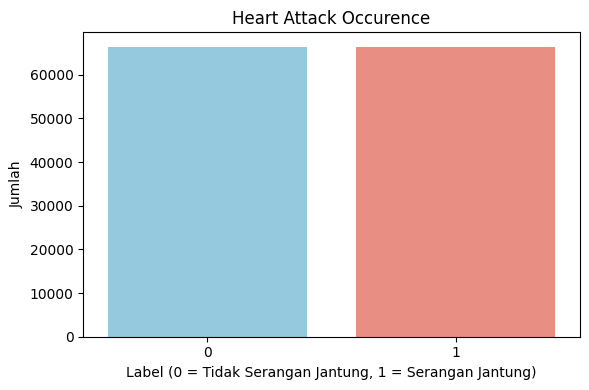

In [113]:
# Visualisasi distribusi label setelah SMOTE
def plot_resampled_distribution(y_resampled):
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_resampled, palette=['skyblue', 'salmon'])
    plt.title("Heart Attack Occurence")
    plt.xlabel("Label (0 = Tidak Serangan Jantung, 1 = Serangan Jantung)")
    plt.ylabel("Jumlah")
    plt.xticks([0, 1], ['0', '1'])
    plt.tight_layout()
    plt.show()

# Panggil fungsi visualisasi
plot_resampled_distribution(y_train)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     28454
           1       0.78      0.78      0.78     28459

    accuracy                           0.78     56913
   macro avg       0.78      0.78      0.78     56913
weighted avg       0.78      0.78      0.78     56913



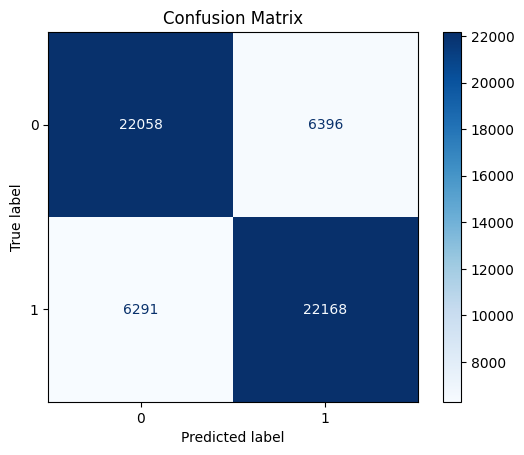

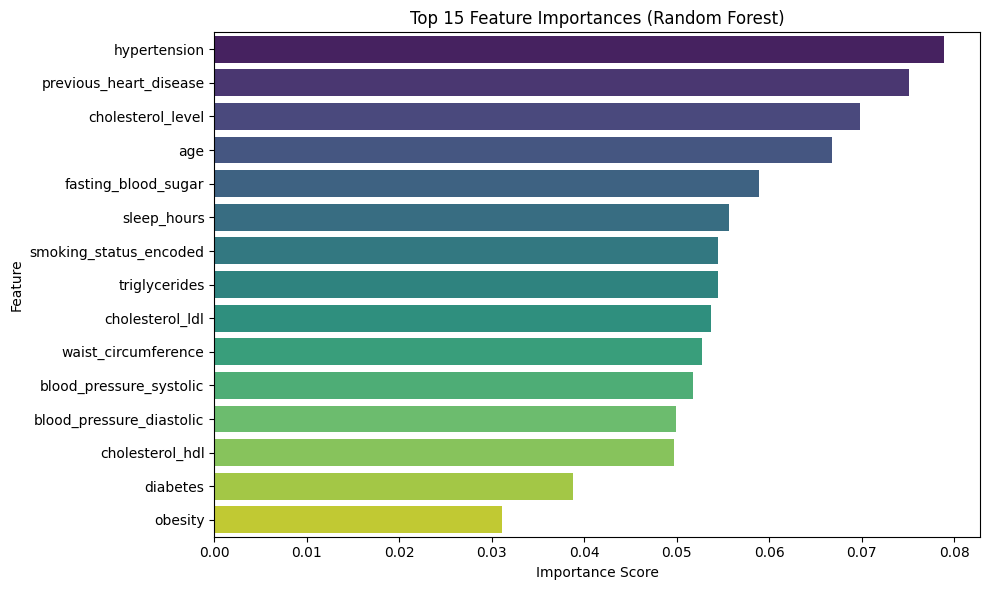

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

# Gunakan data hasil preprocess
X = pd.DataFrame(X_train, columns=[
    col for col in df.columns if col != 'heart_attack' and df[col].dtype in ['int64', 'float64']
] + [col + '_encoded' for col in [
    'gender', 'region', 'income_level', 'EKG_results',
    'smoking_status', 'alcohol_consumption', 'physical_activity',
    'dietary_habits', 'air_pollution_exposure', 'stress_level'
] if col in df.columns])

y = y_train

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# === Classification Report ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index, palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
